# Phishing-Url-Detection-Analysis

# Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Functions

In [28]:
def check_for_nulls_dupes(df):
  print(f"The amount of Null Values: {df.isna().sum()}")
  print(f"The amount of Duplicated Values {df.duplicated().sum()}")

def check_class_imbalance(target):
  unique, counts = np.unique(target, return_counts=True)
  
  plt.figure(figsize=(10, 7))
  plt.pie(counts, labels=unique, startangle=140, autopct="%1.1f%%")
  plt.title("Target Class Breakdown")
  plt.legend()
  plt.show()
  
  plt.figure(figsize=(10, 7))
  sns.countplot(x=target)
  plt.xlabel("Target Class Breakdown")
  plt.ylabel("Counts")
  plt.show()

def plot_distribution(df, kind):
  
  plt.figure(figsize=(16,16))
  columns = len(df.columns)
  rows = (columns + 3) //4
  
  for idx, col in enumerate(df.columns):
    if col == "Type":
      continue
    plt.subplot(rows ,4, idx+1)
    sns.histplot(df[col], kde=True) if kind == "hist" else plt.boxplot(df[col])
    plt.title(f"Distribuition of {col}")
    plt.ylabel("Counts")

  plt.tight_layout()
  plt.show()

# EDA Analysis

In [21]:
df = pd.read_csv("/Users/maukanmir/Downloads/out.csv")
df

,url,source,label,url_length,starts_with_ip,url_entropy,has_punycode,digit_letter_ratio,dot_count,at_count,dash_count,tld_count,domain_has_digits,subdomain_count,nan_char_entropy,has_internal_links,whois_data,domain_age_days
0,apaceast.cloudguest.central.arubanetworks.com,Cisco-Umbrella,legitimate,45,False,3.924535,False,0.000000,4,0,0,0,False,3,0.310387,False,"{'domain_name': ['ARUBANETWORKS.COM', 'arubane...",8250.0
1,quintadonoval.com,Majestic,legitimate,17,False,3.572469,False,0.000000,1,0,0,0,False,0,0.240439,False,"{'domain_name': ['QUINTADONOVAL.COM', 'quintad...",10106.0
2,nomadfactory.com,Majestic,legitimate,16,False,3.327820,False,0.000000,1,0,0,0,False,0,0.250000,False,"{'domain_name': ['NOMADFACTORY.COM', 'nomadfac...",8111.0
3,tvarenasport.com,Majestic,legitimate,16,False,3.500000,False,0.000000,1,0,0,0,False,0,0.250000,False,"{'domain_name': ['TVARENASPORT.COM', 'tvarenas...",5542.0
4,widget.cluster.groovehq.com,Cisco-Umbrella,legitimate,27,False,3.930270,False,0.000000,3,0,0,0,False,2,0.352214,False,"{'domain_name': 'GROOVEHQ.COM', 'registrar': '...",5098.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499995,http://atualizacao.novoatendimentocaixa.ml/sinbc,Phishing.Database,phishing,48,False,4.068902,False,0.000000,2,0,0,0,False,1,0.557393,False,"{'domain_name': 'novoatend', 'registrar': None...",NaN
2499996,https://ingcomptebe-1cd7e.firebaseapp.com,Phishing.Database,phishing,41,False,4.257078,False,0.060606,2,0,1,0,False,1,0.555799,False,NaN,NaN
2499997,http://yonphweisdowedych.chaseonlinemarketing....,Phishing.Database,phishing,66,False,4.393366,False,0.000000,2,0,0,0,False,1,0.581139,False,NaN,NaN
2499998,http://alternateangle.in/~pugepupgee/.wkwk/lkd...,Phishing.Database,phishing,102,False,4.763413,False,0.194444,3,0,0,0,False,0,0.787769,False,"{'domain_name': 'alternateangle.in', 'registra...",4622.0


In [4]:
df.dtypes

url                    object
source                 object
label                  object
url_length              int64
starts_with_ip           bool
url_entropy           float64
has_punycode             bool
digit_letter_ratio    float64
dot_count               int64
at_count                int64
dash_count              int64
tld_count               int64
domain_has_digits        bool
subdomain_count         int64
nan_char_entropy      float64
has_internal_links       bool
whois_data             object
domain_age_days       float64
dtype: object

In [5]:
df.describe()

,url_length,url_entropy,digit_letter_ratio,dot_count,at_count,dash_count,tld_count,subdomain_count,nan_char_entropy,domain_age_days
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.0,25000.000000,25000.0,25000.000000,25000.000000,22839.000000
mean,20.033960,3.443180,0.054492,1.786920,0.0,0.430840,0.0,0.727520,0.311313,5538.476159
std,13.651231,0.419707,0.175205,1.296697,0.0,1.054278,0.0,1.295338,0.066633,3474.922993
min,4.000000,1.750000,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.122041,0.000000
25%,12.000000,3.180833,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.260459,2453.000000
50%,17.000000,3.454822,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.314494,5673.000000
75%,24.000000,3.721612,0.000000,2.000000,0.0,0.000000,0.0,1.000000,0.352214,8636.000000
max,238.000000,4.941534,3.666667,36.000000,0.0,13.000000,0.0,35.000000,0.500000,14382.000000


# Check For Nulls And Dupes

In [16]:
check_for_nulls_dupes(df)

The amount of Null Values: url                      0
source                   0
label                    0
url_length               0
starts_with_ip           0
url_entropy              0
has_punycode             0
digit_letter_ratio       0
dot_count                0
at_count                 0
dash_count               0
tld_count                0
domain_has_digits        0
subdomain_count          0
nan_char_entropy         0
has_internal_links       0
whois_data             405
domain_age_days       2536
dtype: int64
The amount of Duplicated Values 0


In [17]:
df["whois_data"].unique()

array(["{'domain_name': ['ARUBANETWORKS.COM', 'arubanetworks.com'], 'registrar': 'MarkMonitor, Inc.', 'whois_server': 'whois.markmonitor.com', 'referral_url': None, 'updated_date': ['2024-04-17T14:29:21.000', '2024-04-17T14:29:21.000Z'], 'creation_date': ['2002-02-06T02:15:38.000', '2002-02-06T02:15:38.000Z'], 'expiration_date': ['2026-02-06T02:15:38.000', '2026-02-06T00:00:00.000Z'], 'name_servers': ['NS-1473.AWSDNS-56.ORG', 'NS-1639.AWSDNS-12.CO.UK', 'NS-299.AWSDNS-37.COM', 'NS-751.AWSDNS-29.NET', 'ns-751.awsdns-29.net', 'ns-299.awsdns-37.com', 'ns-1639.awsdns-12.co.uk', 'ns-1473.awsdns-56.org'], 'status': ['clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'clientUpdateProhibited https://icann.org/epp#clientUpdateProhibited', 'serverDeleteProhibited https://icann.org/epp#serverDeleteProhibited', 'serverTransferProhibited https://icann.org/epp#serverTransferProhibited', 'serverUpdateProhibi

In [12]:
print(df["domain_age_days"].mean())

5538.4761592013665

In [13]:
print(df["domain_age_days"].median())

5673.0


# Check Class Imbalance

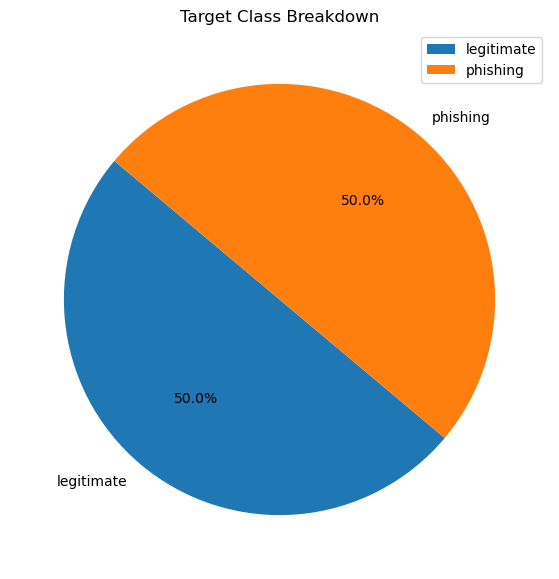

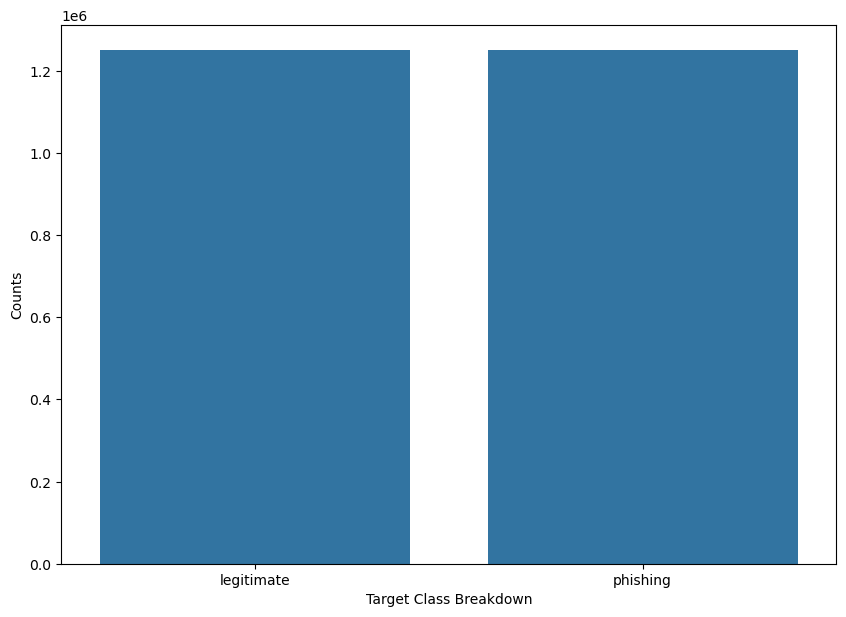

In [22]:
check_class_imbalance(df["label"])

In [23]:
df

,url,source,label,url_length,starts_with_ip,url_entropy,has_punycode,digit_letter_ratio,dot_count,at_count,dash_count,tld_count,domain_has_digits,subdomain_count,nan_char_entropy,has_internal_links,whois_data,domain_age_days
0,apaceast.cloudguest.central.arubanetworks.com,Cisco-Umbrella,legitimate,45,False,3.924535,False,0.000000,4,0,0,0,False,3,0.310387,False,"{'domain_name': ['ARUBANETWORKS.COM', 'arubane...",8250.0
1,quintadonoval.com,Majestic,legitimate,17,False,3.572469,False,0.000000,1,0,0,0,False,0,0.240439,False,"{'domain_name': ['QUINTADONOVAL.COM', 'quintad...",10106.0
2,nomadfactory.com,Majestic,legitimate,16,False,3.327820,False,0.000000,1,0,0,0,False,0,0.250000,False,"{'domain_name': ['NOMADFACTORY.COM', 'nomadfac...",8111.0
3,tvarenasport.com,Majestic,legitimate,16,False,3.500000,False,0.000000,1,0,0,0,False,0,0.250000,False,"{'domain_name': ['TVARENASPORT.COM', 'tvarenas...",5542.0
4,widget.cluster.groovehq.com,Cisco-Umbrella,legitimate,27,False,3.930270,False,0.000000,3,0,0,0,False,2,0.352214,False,"{'domain_name': 'GROOVEHQ.COM', 'registrar': '...",5098.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499995,http://atualizacao.novoatendimentocaixa.ml/sinbc,Phishing.Database,phishing,48,False,4.068902,False,0.000000,2,0,0,0,False,1,0.557393,False,"{'domain_name': 'novoatend', 'registrar': None...",NaN
2499996,https://ingcomptebe-1cd7e.firebaseapp.com,Phishing.Database,phishing,41,False,4.257078,False,0.060606,2,0,1,0,False,1,0.555799,False,NaN,NaN
2499997,http://yonphweisdowedych.chaseonlinemarketing....,Phishing.Database,phishing,66,False,4.393366,False,0.000000,2,0,0,0,False,1,0.581139,False,NaN,NaN
2499998,http://alternateangle.in/~pugepupgee/.wkwk/lkd...,Phishing.Database,phishing,102,False,4.763413,False,0.194444,3,0,0,0,False,0,0.787769,False,"{'domain_name': 'alternateangle.in', 'registra...",4622.0


In [24]:
df.drop("whois_data", axis=1, inplace=True)

In [25]:
categorical_types = df.select_dtypes(include="object")
numerical_types = df.select_dtypes(exclude="object")

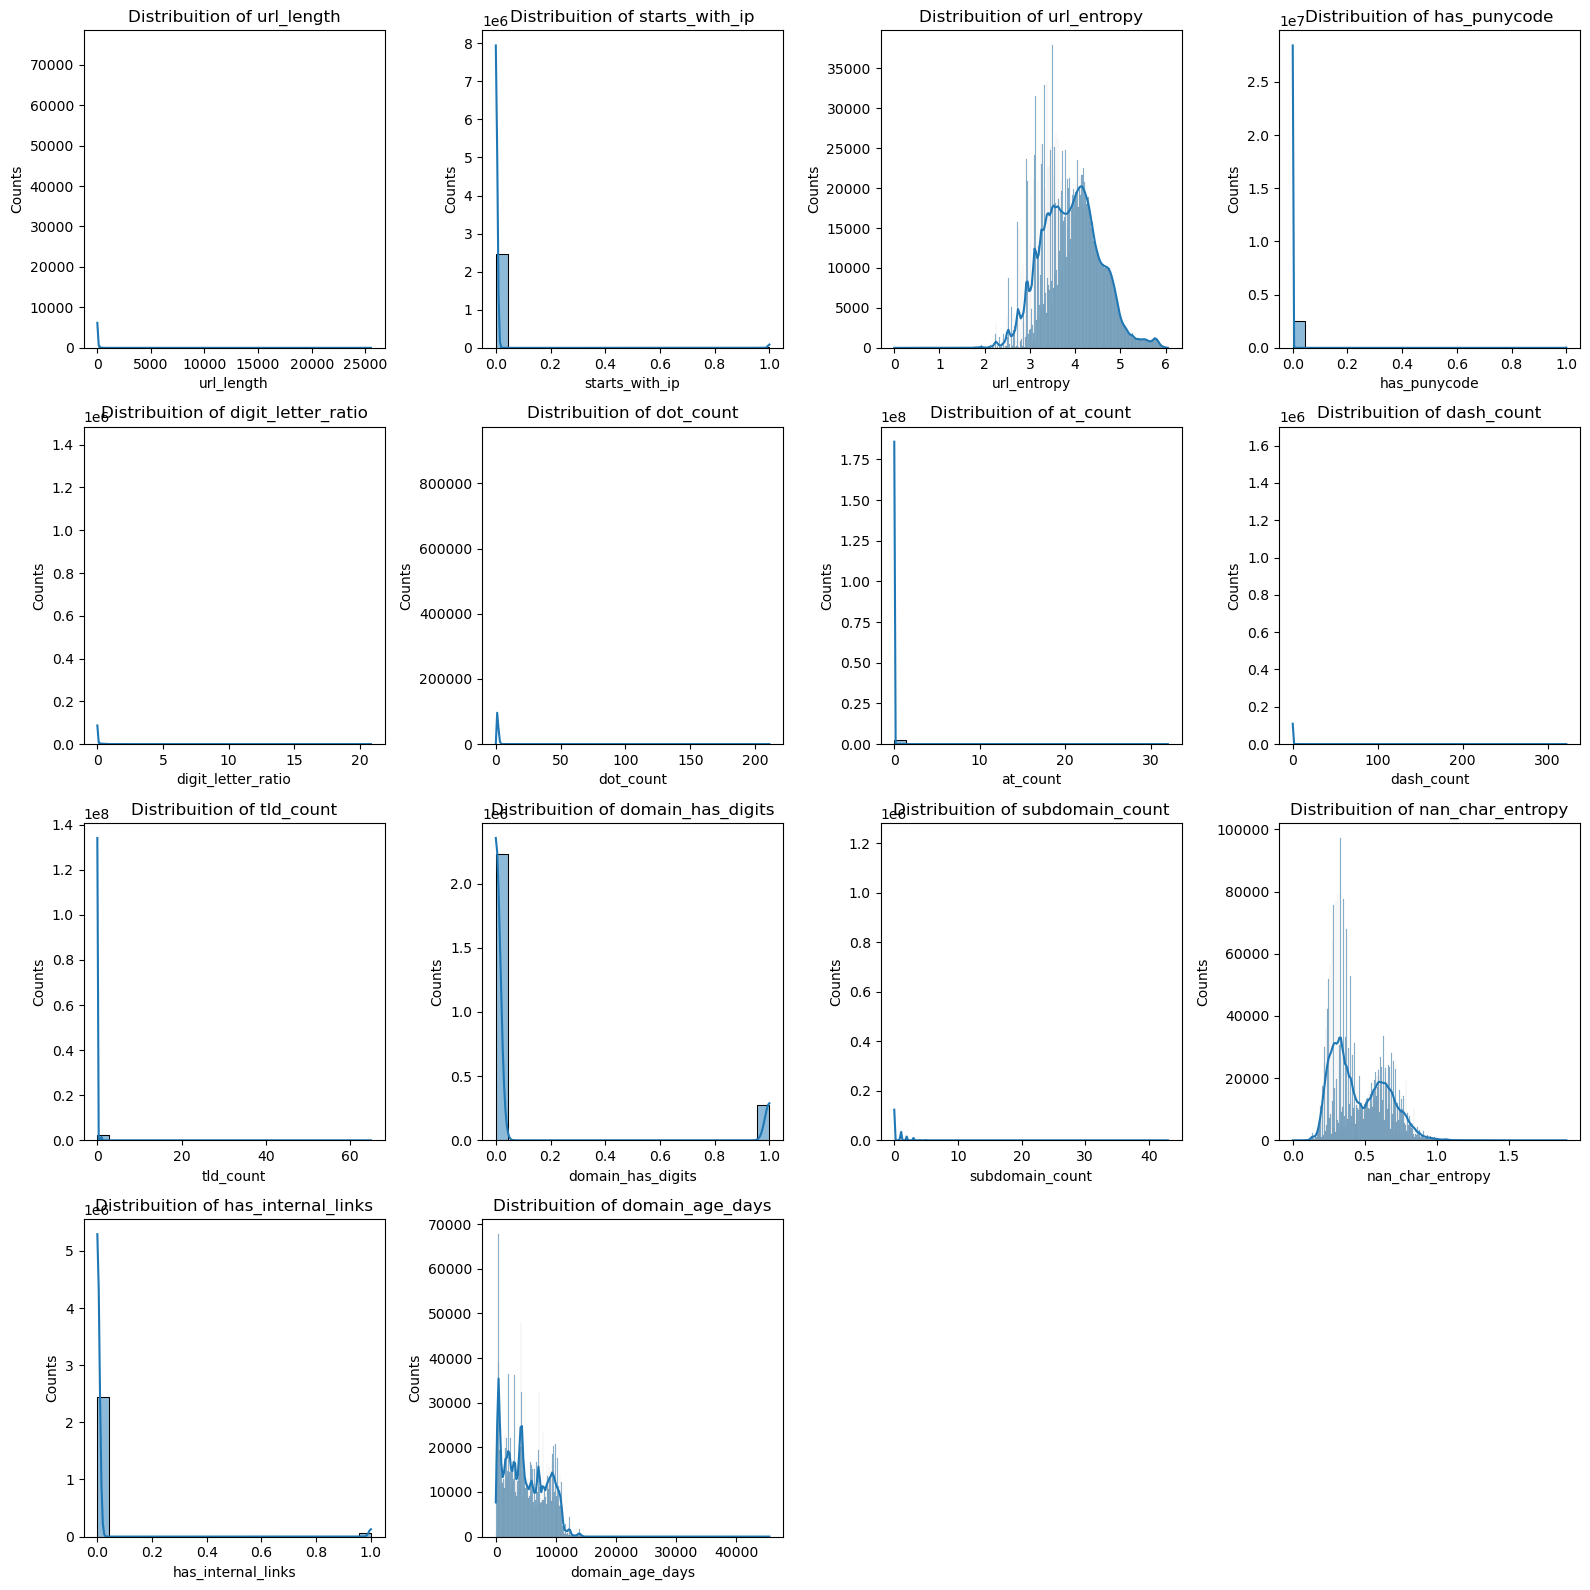

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

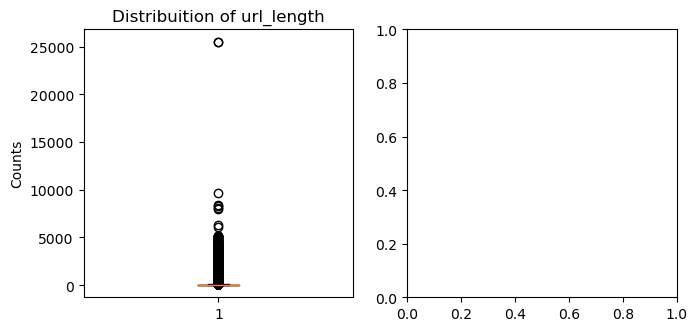

In [29]:
plot_distribution(numerical_types, "hist")
plot_distribution(numerical_types, "box")